## **Establish connection with GitHub using SSH protocol.**

In [1]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ssh keys were generated earlier. Private and Public keys are stored in 
# 'colabkey' and 'colabkey.pub' files. Additionally a config file is also 
# stored in /content/drive/MyDrive/ssh_keys/ on google drive.

# Remove ssh folder and its contents if already present
!rm -rf /root/.ssh

# Create a directory
!mkdir /root/.ssh

# Copy everything (ssh_key files & config file) from google drive to Virtual Machine.  
!cp /content/drive/MyDrive/ssh_keys/* /root/.ssh

# Set permission
!chmod 700 /root/.ssh

In [3]:
# Add the git server as an ssh known host
!touch /root/.ssh/known_hosts

# Trust github  
!ssh-keyscan github.com >> /root/.ssh/known_hosts

# Set permission  
!chmod 644 /root/.ssh/known_hosts 

# github.com:22 SSH-2.0-babeld-9ba447d6
# github.com:22 SSH-2.0-babeld-9ba447d6
# github.com:22 SSH-2.0-babeld-9ba447d6
# github.com:22 SSH-2.0-babeld-9ba447d6
# github.com:22 SSH-2.0-babeld-9ba447d6


In [4]:
# Run ssh-agent and add `ssh-add /root/.ssh/colabkey` in the prompt. 
# After this command, optinally check if the key is saved using `ssh-add -l`, 
# then exit the prompt.
!ssh-agent /bin/bash

bash: cannot set terminal process group (491): Inappropriate ioctl for device
bash: no job control in this shell
/content# ssh-add /root/.ssh/colabkey
Identity added: /root/.ssh/colabkey (shreyasdb99@gmail.com)
/content# exit
exit


In [5]:
# Check connection with github
!ssh -T git@github.com

Hi shre-db! You've successfully authenticated, but GitHub does not provide shell access.


In [6]:
# Navigate to the project folder
cd drive/MyDrive/ColabProjects/Pneumonia-detection-using-chest-X-ray-images-and-Convolutional-Neural-Networks

/content/drive/MyDrive/ColabProjects/Pneumonia-detection-using-chest-X-ray-images-and-Convolutional-Neural-Networks


In [7]:
!ls

data  images  LICENSE  notebook.ipynb  README.md


## **Initialize git repository if not already**

In [ ]:
# # Initialize the directory as a git repository (if not already)
# !git init

Initialized empty Git repository in /content/drive/MyDrive/ColabProjects/Pneumonia-detection-using-chest-X-ray-images-and-Convolutional-Neural-Networks/.git/


In [ ]:
# # Configure user name and email (if not already)
# !git config user.name "shre-db"
# !git config user.email "shreyasdb99@gmail.com"

In [ ]:
# Check Staging Area
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	notebook.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
# # Add Commit and Push
# !echo "# Pneumonia-detection-using-chest-X-ray-images-and-Convolutional-Neural-Networks" >> README.md
# !git add README.md notebook.ipynb
# !git commit -m "Add README and notebook" -m "This commit includes a README file and a notebook containing code for preliminary setup."
# !git branch -M main
# !git remote add origin git@github.com:shre-db/Pneumonia-detection-using-chest-X-ray-images-and-Convolutional-Neural-Networks.git
# !git push -u origin main

[master (root-commit) 3216718] Add README and notebook
 2 files changed, 2 insertions(+)
 create mode 100644 README.md
 create mode 100644 notebook.ipynb
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 3.12 KiB | 639.00 KiB/s, done.
Total 4 (delta 0), reused 0 (delta 0)
To github.com:shre-db/Pneumonia-detection-using-chest-X-ray-images-and-Convolutional-Neural-Networks.git
 * [new branch]      main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


## **Use cells in this section to execute commands**

In [103]:
!git status

Refresh index: 100% (4/4), done.
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   notebook.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	data/

no changes added to commit (use "git add" and/or "git commit -a")


In [104]:
!git pull

Already up to date.


In [ ]:
!git add images/
!git commit -m "Update Notebook" -m "Tried CrossEntropyLoss loss function for two unit output layer"
!git push

[main 099bc98] Add images/
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 images/xray_cover.jpeg
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 293.92 KiB | 9.80 MiB/s, done.
Total 4 (delta 0), reused 0 (delta 0)
To github.com:shre-db/Pneumonia-detection-using-chest-X-ray-images-and-Convolutional-Neural-Networks.git
   af4d748..099bc98  main -> main


## **Working with data**

In [8]:
# Import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

from torchsummary import summary

import torchvision.transforms as T
from torchvision.datasets import ImageFolder

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import os
import sys

import matplotlib.pyplot as plt

In [9]:
# Use GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [10]:
# Load the datasets
transforms = T.Compose([
    T.Grayscale(),
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
])

train_data = ImageFolder(os.path.abspath('data/train'), transform=transforms)
test_data = ImageFolder(os.path.abspath('data/test'), transform=transforms)

In [11]:
image, target = train_data[0]

In [12]:
image.shape

torch.Size([1, 224, 224])

In [13]:
train_data[0]

(tensor([[[0.5176, 0.5137, 0.5176,  ..., 0.5961, 0.5922, 0.5882],
          [0.5294, 0.5137, 0.5098,  ..., 0.6078, 0.6000, 0.5882],
          [0.5294, 0.5176, 0.5137,  ..., 0.6078, 0.6000, 0.5922],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.5255, 0.4314, 0.3647],
          [0.0000, 0.0000, 0.0000,  ..., 0.5176, 0.4314, 0.3490],
          [0.0000, 0.0000, 0.0000,  ..., 0.5098, 0.4196, 0.3412]]]), 0)

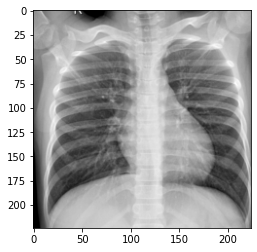

In [14]:
plt.imshow(image.squeeze(), cmap='gray')
plt.show()

In [15]:
# Number of normal images
train_data.class_to_idx

{'NORMAL': 0, 'PNEUMONIA': 1}

In [16]:
print(f'Number of NORMAL images: {train_data.targets.count(0)}')
print(f'Number of PNEUMONIA images: {train_data.targets.count(1)}')

Number of NORMAL images: 1349
Number of PNEUMONIA images: 3883


There are 1349 images in NORMAL class and 3884 in PNEUMONIA class. Roughly 3 times more in PNEUMONIA. To handle imbalance in the classes, we will use weighted loss function.

In [90]:
# Translate to dataloaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True, drop_last=True)

In [78]:
# # Create a DL model
# def createNet():

#   class XrayNet(nn.Module):
#     def __init__(self):
#       super().__init__()

#       # ---------------- Feature map layers ---------------- #

#       self.features = nn.Sequential(
#         # First Convolution block
#         nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),
#         nn.MaxPool2d(kernel_size=2, stride=2),
#         nn.BatchNorm2d(16),
#         nn.LeakyReLU(),
#         nn.Dropout(p=0.25),

#         # Output size after pooling: np.floor((224+2*1-3)/1)+1 = 224/2 = 112 (divide by 2 because we're maxpooling)
      

#         nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
#         nn.MaxPool2d(kernel_size=2, stride=2),
#         nn.BatchNorm2d(32),
#         nn.LeakyReLU(),
#         nn.Dropout(p=0.25),

#         # Output size after pooling: np.floor((112+2*1-3)/1)+1 = 112/2 = 56


#         nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
#         nn.MaxPool2d(kernel_size=2, stride=2),
#         nn.BatchNorm2d(64),
#         nn.LeakyReLU(),
#         nn.Dropout(p=0.25),

#         # Output size after pooling: np.floor((56+2*1-3)/1)+1 = 56/2 = 28


#         nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
#         nn.MaxPool2d(kernel_size=2, stride=2),
#         nn.BatchNorm2d(128),
#         nn.LeakyReLU(),
#         nn.Dropout(p=0.25),

#         # Output size after pooling: np.floor((28+2*1-3)/1)+1 = 28/2 = 14
#       )

#       # ------- Calculate number of units in the FC layer ------- #

#       inp_size = np.floor((14+2*0-1)/1)+1 # because fc1 layer has no padding or kernel.
#       inp_size = 128*int(inp_size**2) 

#       # ---------------- Linear decision layers ---------------- #
       
#       self.classifier = nn.Sequential(
          
#         nn.Linear(inp_size, 256),
#         nn.LeakyReLU(),
#         nn.Dropout(p=0.5),

#         nn.Linear(256, 64),
#         nn.LeakyReLU(),
#         nn.Dropout(p=0.5),

#         nn.Linear(64, 64),
#         nn.LeakyReLU(),
#         nn.Dropout(p=0.5),

#         nn.Linear(64, 1),
#       )
 

#     def forward(self, X):
#       X = self.features(X)
#       X = X.view(X.size(0), -1)
#       X = self.classifier(X)

#       return X


#   # Create the model instance
#   net = XrayNet()

#   # Calculations for weighted loss function
#   ratio = torch.tensor(train_data.targets.count(1)/train_data.targets.count(0))

#   # loss function
#   lossfun = nn.BCEWithLogitsLoss(pos_weight=ratio)

#   # optimizer
#   optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

#   return net, lossfun, optimizer

In [93]:
# Create a DL model
def createNet(print_statements=False):

  class XrayNet(nn.Module):

    def __init__(self, print_statements):
      super().__init__()
      self.print_statements = print_statements

      # ---------------- Feature map layers ---------------- #

      # 1st convolution layer
      self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
      self.bnorm1 = nn.BatchNorm2d(32) # Input the number of channels (32) in this layer.
      # Output size after pooling: np.floor((224+2*1-3)/1)+1 = 224/2 = 112 (divide by 2 because we're maxpooling)

      # 2nd convolution layer
      self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
      self.bnorm2 = nn.BatchNorm2d(64) # 64 channels in this layer.
      # Output size after pooling: np.floor((112+2*0-3)/1)+1 = 112/2 = 56 

      # 3rd convolution layer
      self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
      self.bnorm3 = nn.BatchNorm2d(128) # 128 channels in this layer.
      # Output size after pooling: np.floor((56+2*1-3)/1)+1 = 56/2 = 28

      # 4th convolution layer
      self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
      self.bnorm4 = nn.BatchNorm2d(256) # 256 channels in this layer.
      # Output size after pooling: np.floor((28+2*1-3)/1)+1 = 28/2 = 14

      # 5th convolution layer
      self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=0)
      self.bnorm5 = nn.BatchNorm2d(512) # 512 channels in this layer.
      # Output size after pooling: np.floor((14+2*0-3)/1)+1 = 12/2 = 6

      # 6th convolution layer
      self.conv6 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, stride=1, padding=0)
      self.bnorm6 = nn.BatchNorm2d(1024) # 1024 channels in this layer.
      # Output size after pooling: np.floor((6+2*0-3)/1)+1 = 4/2 = 2

      # Compute the number of units in fully connected layers (=number of outputs of conv6)
      inp_size = np.floor((2+2*0-1)/1)+1 # because fc1 layer has no padding or kernel.
      inp_size = 1024*int(inp_size**2) # 1024*2*2 = 4096

      # ---------------- Linear decision layers ---------------- #

      self.fc1 = nn.Linear(inp_size, 2048)
      self.fc2 = nn.Linear(2048, 1024)
      self.fc3 = nn.Linear(1024, 512)
      self.fc4 = nn.Linear(512, 256) 
      self.fc5 = nn.Linear(256, 64)
      self.fc6 = nn.Linear(64, 2)  

    def forward(self, X):
      if self.print_statements: print(f"Input: {list(X.shape)}")

      # 1st block: convolution -> maxpool -> batchnorm -> relu -> dropout
      X = F.max_pool2d(self.conv1(X), 2)
      X = F.leaky_relu(self.bnorm1(X))
      X = F.dropout(X, p=0.25, training=self.training)
      if self.print_statements: print(f"First block: {list(X.shape)}")

      # 2nd block: convolution -> maxpool -> batchnorm -> relu -> dropout
      X = F.max_pool2d(self.conv2(X), 2)
      X = F.leaky_relu(self.bnorm2(X))
      X = F.dropout(X, p=0.25, training=self.training)
      if self.print_statements: print(f"Second block: {list(X.shape)}")

      # 3rd block: convolution -> maxpool -> batchnorm -> relu -> dropout
      X = F.max_pool2d(self.conv3(X), 2)
      X = F.leaky_relu(self.bnorm3(X))
      X = F.dropout(X, p=0.25, training=self.training)
      if self.print_statements: print(f"Third block: {list(X.shape)}")

      # 4th block: convolution -> maxpool -> batchnorm -> relu -> dropout
      X = F.max_pool2d(self.conv4(X), 2)
      X = F.leaky_relu(self.bnorm4(X))
      X = F.dropout(X, p=0.25, training=self.training)
      if self.print_statements: print(f"Fourth block: {list(X.shape)}")

      # 5th block: convolution -> maxpool -> batchnorm -> relu -> dropout
      X = F.max_pool2d(self.conv5(X), 2)
      X = F.leaky_relu(self.bnorm5(X))
      X = F.dropout(X, p=0.25, training=self.training)
      if self.print_statements: print(f"Fifth block: {list(X.shape)}")

      # 6th block: convolution -> maxpool -> batchnorm -> relu -> dropout
      X = F.max_pool2d(self.conv6(X), 2)
      X = F.leaky_relu(self.bnorm6(X))
      X = F.dropout(X, p=0.25, training=self.training)
      if self.print_statements: print(f"Sixth block: {list(X.shape)}")

      # reshape for linear layers
      nUnits = X.shape.numel()/X.shape[0]
      X = X.view(-1, int(nUnits))
      if self.print_statements: print(f'vectorized: {list(X.shape)}')

      # Linear layers
      X = F.leaky_relu(self.fc1(X))
      X = F.dropout(X, p=0.5, training=self.training)
      X = F.leaky_relu(self.fc2(X))
      X = F.dropout(X, p=0.5, training=self.training)
      X = F.leaky_relu(self.fc3(X))
      X = F.dropout(X, p=0.5, training=self.training)
      X = F.leaky_relu(self.fc4(X))
      X = F.dropout(X, p=0.5, training=self.training)
      X = F.leaky_relu(self.fc5(X))
      X = F.dropout(X, p=0.5, training=self.training)
      X = self.fc6(X)
      if self.print_statements: print(f'Final Output: {list(X.shape)}')

      return X

  # Create the model instance
  net = XrayNet(print_statements)

  # Calculations for weighted loss function
  class_weights = []
  for i in range(len(train_data.classes)):
    weight_i = len(train_data)/(train_data.targets.count(i) * len(train_data.classes))
    class_weights.append(weight_i)

  # loss function
  lossfun = nn.CrossEntropyLoss(weight=torch.tensor(class_weights))

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

  return net, lossfun, optimizer

In [95]:
# test the model with one batch
net, lossfun, optimizer = createNet()

X, y = next(iter(train_loader))
yHat = net(X)

# check size of output
print('\Output size:')
print(yHat.shape)

# compute loss
loss = lossfun(yHat, y)
print('\nLoss: ')
print(loss)

\Output size:
torch.Size([32, 2])

Loss: 
tensor(0.7050, grad_fn=<NllLossBackward0>)


In [96]:
summary(net.to(device), (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             320
       BatchNorm2d-2         [-1, 32, 112, 112]              64
            Conv2d-3         [-1, 64, 112, 112]          18,496
       BatchNorm2d-4           [-1, 64, 56, 56]             128
            Conv2d-5          [-1, 128, 56, 56]          73,856
       BatchNorm2d-6          [-1, 128, 28, 28]             256
            Conv2d-7          [-1, 256, 28, 28]         295,168
       BatchNorm2d-8          [-1, 256, 14, 14]             512
            Conv2d-9          [-1, 512, 12, 12]       1,180,160
      BatchNorm2d-10            [-1, 512, 6, 6]           1,024
           Conv2d-11           [-1, 1024, 4, 4]       4,719,616
      BatchNorm2d-12           [-1, 1024, 2, 2]           2,048
           Linear-13                 [-1, 2048]       8,390,656
           Linear-14                 [-

In [100]:
# Function to train the model
def trainTheModel():
  # number of epochs
  numepochs = 10

  # Create a model
  net, lossfun, optimizer = createNet()

  # Send the model to the GPU
  net.to(device)
  lossfun.to(device)

  # initialize Losses
  trainLoss = torch.zeros(numepochs)
  testLoss = torch.zeros(numepochs)
  trainAcc = torch.zeros(numepochs)
  testAcc = torch.zeros(numepochs)

  # Loop over the epochs
  for epoch in range(numepochs):

    # Loop over training data batches
    net.train()
    batchLoss = []
    batchAcc = []
    # for (X,y), count in zip(train_loader, range(len(train_loader))):
    for (X,y), count in zip(train_loader, range(len(train_loader))):

      # Push the data to GPU
      X = X.to(device)
      y = y.to(device)

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat, y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Loss and error from this batch
      batchLoss.append(loss.item())
      batchAcc.append(torch.mean((torch.argmax(yHat , axis=1) == y).float()).item())
      msg = 'Completed {}/{}'.format(count, len(train_loader))
      sys.stdout.write('\r' + msg)

    # and get average losses and accuracies across the batches
    trainLoss[epoch] = np.mean(batchLoss)
    trainAcc[epoch]  = 100*np.mean(batchAcc)
    # end of batch loop...

    # test performance
    net.eval() # switch to test mode
    batchAcc  = []
    batchLoss = []
    # for (X,y), count in zip(test_loader, range(len(test_loader))):
    for (X,y), count in zip(test_loader, range(len(test_loader))):

      # push data to GPU
      X = X.to(device)
      y = y.to(device)

      # forward pass and loss
      with torch.no_grad():
        yHat = net(X)
        loss = lossfun(yHat, y)
      
      # loss and accuracy from this batch
      batchLoss.append(loss.item())
      batchAcc.append( torch.mean((torch.argmax(yHat, axis=1) == y).float()).item())
      msg = 'Completed {}/{}'.format(count, len(test_loader))
      sys.stdout.write('\r' + msg)
    # end of batch loop...

    # and get average losses and accuracies across the batches
    testLoss[epoch] = np.mean(batchLoss)
    testAcc[epoch]  = 100*np.mean(batchAcc)
    print(f' Epoch {epoch+1}/{numepochs}')
  # end epochs
    
    
  # function output
  return trainLoss, testLoss, trainAcc, testAcc, net

In [101]:
trainLoss, testLoss, trainAcc, testAcc, net = trainTheModel()

Completed 18/19 Epoch 1/10
Completed 18/19 Epoch 2/10
Completed 18/19 Epoch 3/10
Completed 18/19 Epoch 4/10
Completed 18/19 Epoch 5/10
Completed 18/19 Epoch 6/10
Completed 18/19 Epoch 7/10
Completed 18/19 Epoch 8/10
Completed 18/19 Epoch 9/10
Completed 18/19 Epoch 10/10


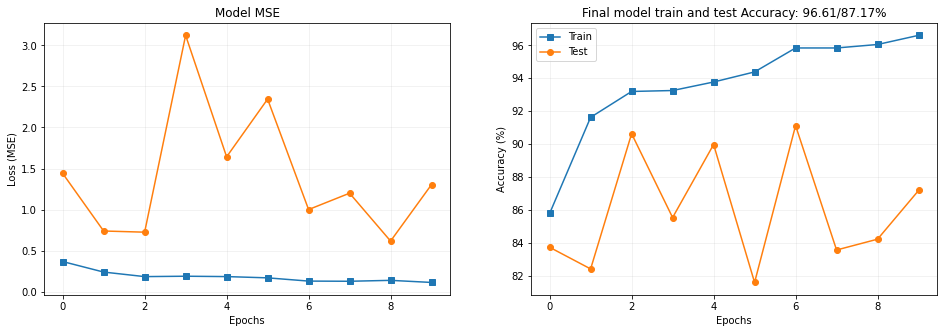

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(trainLoss, 's-', label='Train')
ax[0].plot(testLoss, 'o-', label='Test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss (MSE)')
ax[0].set_title('Model MSE')
ax[0].grid(alpha=0.2)

ax[1].plot(trainAcc, 's-', label='Train')
ax[1].plot(testAcc, 'o-', label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model train and test Accuracy: {trainAcc[-1]:.2f}/{testAcc[-1]:.2f}%')
ax[1].legend()
ax[1].grid(alpha=0.2)

plt.show()